# Nobel Prize Insight

I got the Nobel Prize Data set from the Kaggle. Here, I have applied different data analysis techniques to get the insight of the data and to plot some interesting plots using matplotlib and seaborn. I have learned some techniques from this course: [Data Analysis with Python: Zero to Pandas](zerotopandas.com).



## Downloading the Dataset
I have Downloaded the Nobel Data Set from which is free source for data and it also offers various courses for data analysis and machine learning.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nobel_raw_df=pd.read_csv('nobel.csv')

The dataset has been downloaded and extracted.

In [ ]:
nobel_raw_df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [ ]:
nobel_raw_df.shape

(911, 18)

Let us save and upload our work to Jovian before continuing.

In [ ]:
nobel_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [ ]:
nobel_raw_df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [ ]:
nobel_raw_df.sample(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
369,1965,Physics,The Nobel Prize in Physics 1965,"""for their fundamental work in quantum electro...",1/3,86,Individual,Richard P. Feynman,1918-05-11,"New York, NY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1988-02-15,"Los Angeles, CA",United States of America
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN
406,1970,Medicine,The Nobel Prize in Physiology or Medicine 1970,"""for their discoveries concerning the humoral ...",1/3,396,Individual,Julius Axelrod,1912-05-30,"New York, NY",United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,2004-12-29,"Rockville, MD",United States of America
821,2009,Literature,The Nobel Prize in Literature 2009,"""who, with the concentration of poetry and the...",1/1,844,Individual,Herta Müller,1953-08-17,"Nitzkydorf, Banat",Romania,Female,NaN,NaN,NaN,NaN,NaN,NaN
814,2008,Physics,The Nobel Prize in Physics 2008,"""for the discovery of the origin of the broken...",1/4,827,Individual,Makoto Kobayashi,1944-04-07,Nagoya,Japan,Male,High Energy Accelerator Research Organization ...,Tsukuba,Japan,NaN,NaN,NaN
109,1922,Medicine,The Nobel Prize in Physiology or Medicine 1922,"""for his discovery relating to the production ...",1/2,311,Individual,Archibald Vivian Hill,1886-09-26,Bristol,United Kingdom,Male,London University,London,United Kingdom,1977-06-03,Cambridge,United Kingdom
888,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,908,Individual,Shuji Nakamura,1954-05-22,Ikata,Japan,Male,University of California,"Santa Barbara, CA",United States of America,NaN,NaN,NaN
698,1998,Physics,The Nobel Prize in Physics 1998,"""for their discovery of a new form of quantum ...",1/3,157,Individual,Daniel C. Tsui,1939-02-28,Henan,China,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
805,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,830,Individual,Martin Chalfie,1947-01-15,"Chicago, IL",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN


In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project='Nobel Prize Insight')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khanaabidabdal/nobel-prize-insight" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/khanaabidabdal/nobel-prize-insight


'https://jovian.com/khanaabidabdal/nobel-prize-insight'

## Data Preparation and Cleaning

The directly downloaded data from any sources consists lots of uncleaned data,Nan values,Empty cells and unwanted materials.Therefore, before using any data first we have to clean it to make it in the form which wanted.


In [ ]:
nobel_raw_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [ ]:
nobel_raw_df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [ ]:
selected_cols=['year','category','prize','motivation','prize_share','laureate_id','laureate_type','full_name','birth_date','birth_country','sex']

In [ ]:
nobel_df=nobel_raw_df[selected_cols].copy()

In [ ]:
nobel_df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_country,sex
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Netherlands,Male
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,France,Male
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Prussia (Poland),Male
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Switzerland,Male
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,France,Male
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Prussia (Germany),Male
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Prussia (Germany),Male
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Schleswig (Germany),Male
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,India,Male
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Switzerland,Male


In [ ]:
nobel_df.shape

(911, 11)

In [ ]:
nobel_df.describe()

,year,laureate_id
count,911.000000,911.000000
mean,1969.201976,462.515917
std,32.837978,270.236159
min,1901.000000,1.000000
25%,1946.000000,228.500000
50%,1975.000000,457.000000
75%,1997.000000,698.500000
max,2016.000000,937.000000


In [ ]:
nobel_df.sample(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_country,sex
322,1960,Chemistry,The Nobel Prize in Chemistry 1960,"""for his method to use carbon-14 for age deter...",1/1,224,Individual,Willard Frank Libby,1908-12-17,United States of America,Male
462,1975,Physics,The Nobel Prize in Physics 1975,"""for the discovery of the connection between c...",1/3,104,Individual,Leo James Rainwater,1917-12-09,United States of America,Male
488,1978,Medicine,The Nobel Prize in Physiology or Medicine 1978,"""for the discovery of restriction enzymes and ...",1/3,416,Individual,Hamilton O. Smith,1931-08-23,United States of America,Male
840,2011,Chemistry,The Nobel Prize in Chemistry 2011,"""for the discovery of quasicrystals""",1/1,867,Individual,Dan Shechtman,1941-01-24,British Mandate of Palestine (Israel),Male
903,2016,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",1/2,935,Individual,Oliver Hart,1948-10-09,United Kingdom,Male
272,1953,Chemistry,The Nobel Prize in Chemistry 1953,"""for his discoveries in the field of macromole...",1/1,216,Individual,Hermann Staudinger,1881-03-23,Germany,Male
65,1911,Peace,The Nobel Peace Prize 1911,NaN,1/2,478,Individual,Tobias Michael Carel Asser,1838-04-28,Netherlands,Male
77,1913,Peace,The Nobel Peace Prize 1913,NaN,1/1,481,Individual,Henri La Fontaine,1854-04-22,Belgium,Male
296,1956,Medicine,The Nobel Prize in Physiology or Medicine 1956,"""for their discoveries concerning heart cathet...",1/3,362,Individual,Dickinson W. Richards,1895-10-30,United States of America,Male
33,1906,Medicine,The Nobel Prize in Physiology or Medicine 1906,"""in recognition of their work on the structure...",1/2,298,Individual,Camillo Golgi,1843-07-07,Italy,Male


In [ ]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           911 non-null    int64 
 1   category       911 non-null    object
 2   prize          911 non-null    object
 3   motivation     823 non-null    object
 4   prize_share    911 non-null    object
 5   laureate_id    911 non-null    int64 
 6   laureate_type  911 non-null    object
 7   full_name      911 non-null    object
 8   birth_date     883 non-null    object
 9   birth_country  885 non-null    object
 10  sex            885 non-null    object
dtypes: int64(2), object(9)
memory usage: 78.4+ KB


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khanaabidabdal/nobel-prize-insight" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/khanaabidabdal/nobel-prize-insight


'https://jovian.com/khanaabidabdal/nobel-prize-insight'

## Exploratory Analysis and Visualization

Visualizing the data by plotting the different types of graph help us to understand the data in better way as compared to the numeric values.   


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

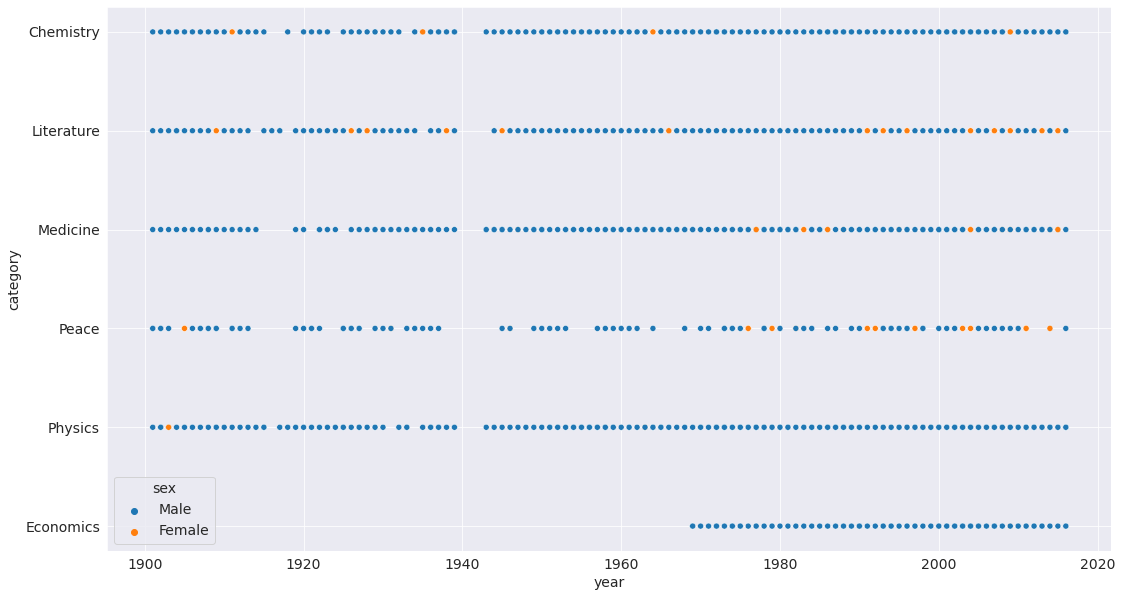

In [ ]:
sns.scatterplot(x='year',y='category',hue='sex',data=nobel_df);

>**From above scatter plot following conclusions can be made:**
>- The Nobel prize in Physics,chemistry,peace,literature and medicine were awarded from the starting of Nobel prize
i.e. from 1901 while economics was added after 1965.
>- During 1939 to 1946 the Nobel prize was not given because of second world war.
Near the period of world war the peace prize was not awarded in huge number.

In [ ]:
nobel_df.loc[390:400]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_country,sex
390,1968,Physics,The Nobel Prize in Physics 1968,"""for his decisive contributions to elementary ...",1/1,89,Individual,Luis Walter Alvarez,1911-06-13,United States of America,Male
391,1969,Chemistry,The Nobel Prize in Chemistry 1969,"""for their contributions to the development of...",1/2,237,Individual,Derek H. R. Barton,1918-09-08,United Kingdom,Male
392,1969,Chemistry,The Nobel Prize in Chemistry 1969,"""for their contributions to the development of...",1/2,238,Individual,Odd Hassel,1897-05-17,Norway,Male
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,677,Individual,Ragnar Frisch,1895-03-03,Norway,Male
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,678,Individual,Jan Tinbergen,1903-04-12,Netherlands,Male
395,1969,Literature,The Nobel Prize in Literature 1969,"""for his writing, which - in new forms for the...",1/1,643,Individual,Samuel Beckett,1906-04-13,Ireland,Male
396,1969,Medicine,The Nobel Prize in Physiology or Medicine 1969,"""for their discoveries concerning the replicat...",1/3,391,Individual,Max Delbrück,1906-09-04,Germany,Male
397,1969,Medicine,The Nobel Prize in Physiology or Medicine 1969,"""for their discoveries concerning the replicat...",1/3,392,Individual,Alfred D. Hershey,1908-12-04,United States of America,Male
398,1969,Medicine,The Nobel Prize in Physiology or Medicine 1969,"""for their discoveries concerning the replicat...",1/3,393,Individual,Salvador E. Luria,1912-08-13,Italy,Male
399,1969,Peace,The Nobel Peace Prize 1969,NaN,1/1,527,Organization,International Labour Organization (I.L.O.),NaN,NaN,NaN


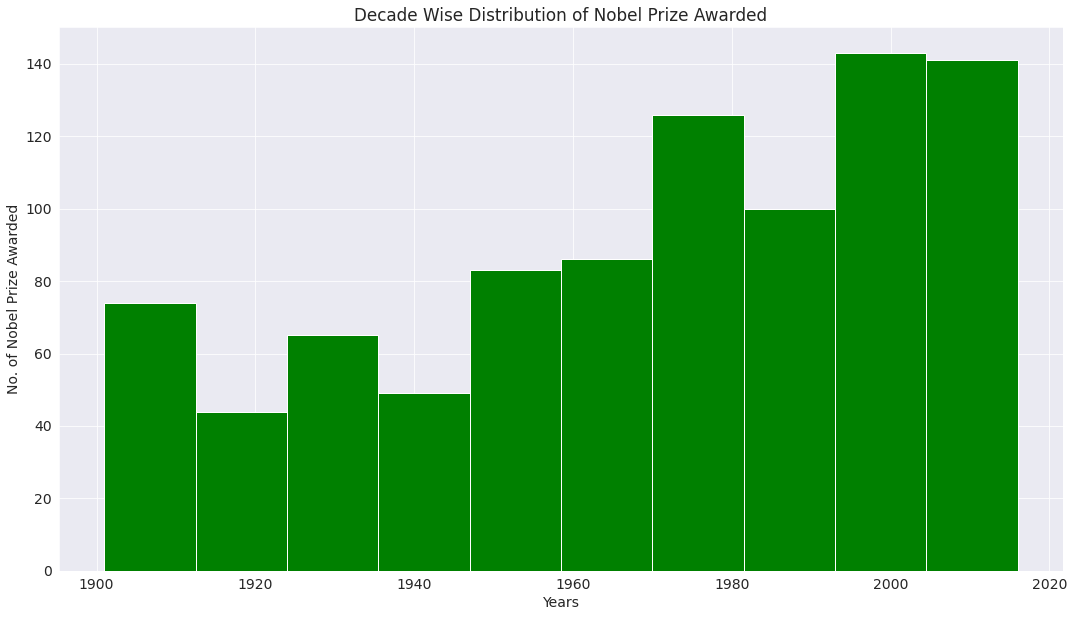

In [ ]:
plt.title("Decade Wise Distribution of Nobel Prize Awarded")
plt.xlabel('Years')
plt.ylabel('No. of Nobel Prize Awarded')
plt.hist(nobel_df.year,bins=10,color='green');

> **Above Histogram represents the decade wise, number of Nobel prize awarded :**
>- From 1910 to 1920 the least number of Nobel prize was awarded while from 2000 to 2010 highest number of Nobel prize
was awarded.

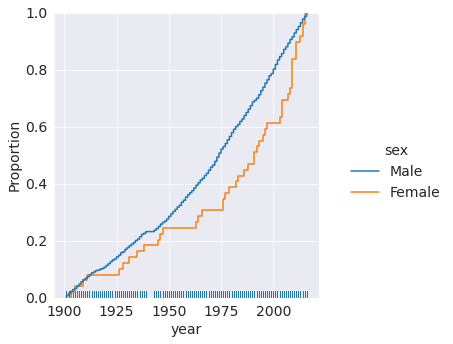

In [ ]:
sns.displot(data=nobel_df, kind="ecdf", x="year", hue="sex", rug=True);

> **The above plot shows the year wise distribution of number of male and female who became the Nobel laureates.**
>
> In the starting of 1900 male and female were approximately equal in receiving the Nobel prize but later on the male laureates
increases tremendously as compared to female laureates.

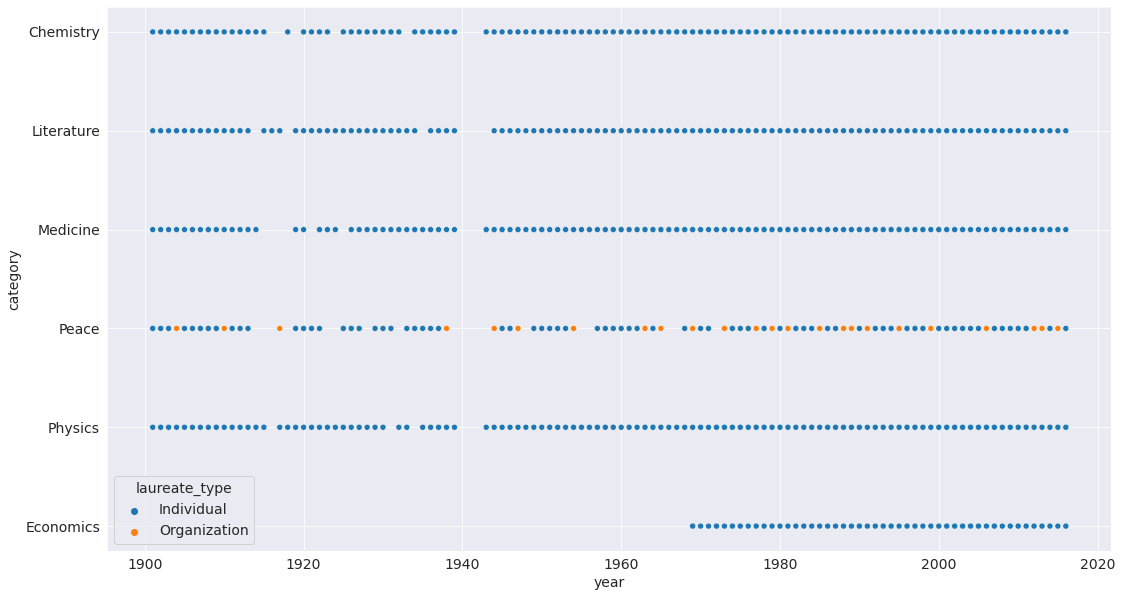

In [ ]:
sns.scatterplot(y='category',x='year',hue='laureate_type',data=nobel_df);

> **From the above scatter plot the following conclusions can be made:**
>
> Only in Peace category, Nobel Prize was given to organizations while in rest of category the Nobel laureates are Individuals.
24 Times Nobel Peace Prize was given to the organizations.

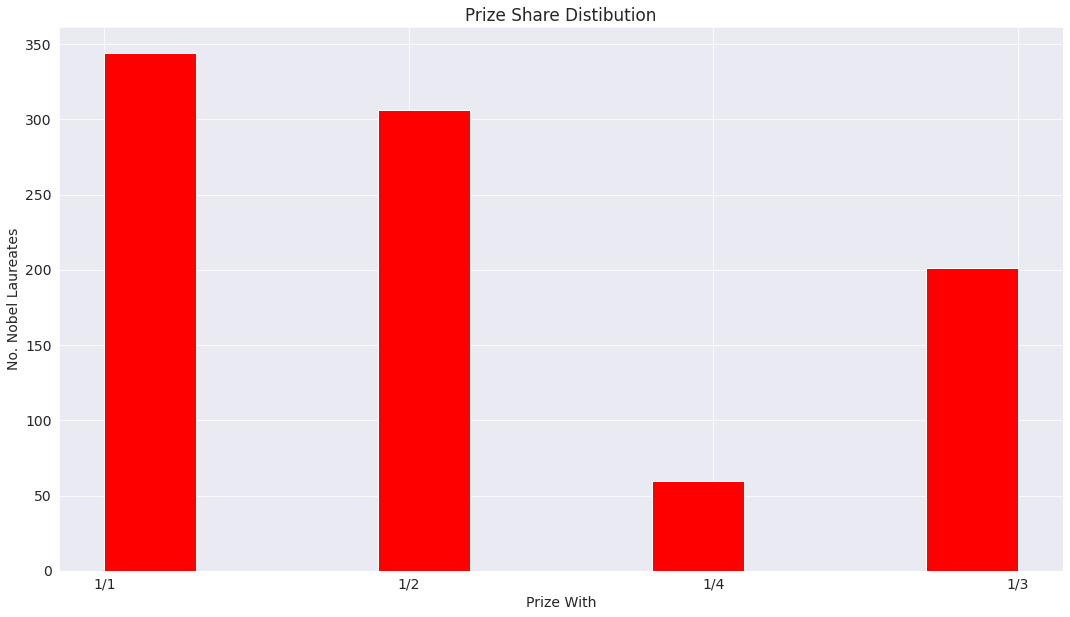

In [ ]:
plt.hist(nobel_df.prize_share,color='red');
plt.title('Prize Share Distibution')
plt.xlabel('Prize With')
plt.ylabel('No. Nobel Laureates');

> **The Following are the conclusions of the histogram :**
>- 1) Approximately 350 times the Nobel Prize was not shared.
>- 2) Approximately 300 times the Nobel Prize was shared between 2 individuals.
>- 3) 200 times the Nobel Prize was shared between 3 individuals.
>- 4) Approximately 50 times Nobel Prize was shared between four Individuals.

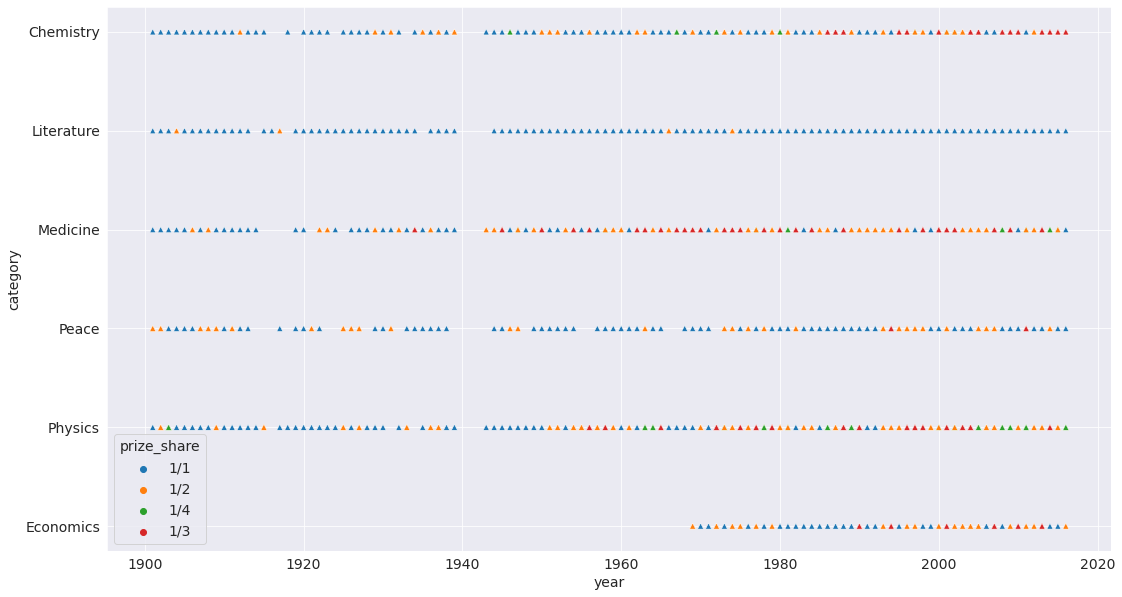

In [ ]:
matplotlib.rcParams['figure.figsize'] = (18, 10)
sns.scatterplot(x='year',y='category',hue='prize_share',marker='^',data=nobel_df);

> **The following conclusions can be made :**
>- The Medicine Category has the highest number of prize shared between Individuals followed by
Physics,Chemistry,Economics respectively.
>- The Peace category has the least number of prize shared with 4 times only.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khanaabidabdal/nobel-prize-insight" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/khanaabidabdal/nobel-prize-insight


'https://jovian.com/khanaabidabdal/nobel-prize-insight'

## Asking and Answering Questions

The core purpose of the data visualization is to find the answer of such question which are not easily to answerable by the
humans in less amount of time.


#### Q1: How many percentage of Nobel Laureates are Female ?

In [ ]:
gender_counts=nobel_df.sex.value_counts()
gender_counts

Male      836
Female     49
Name: sex, dtype: int64

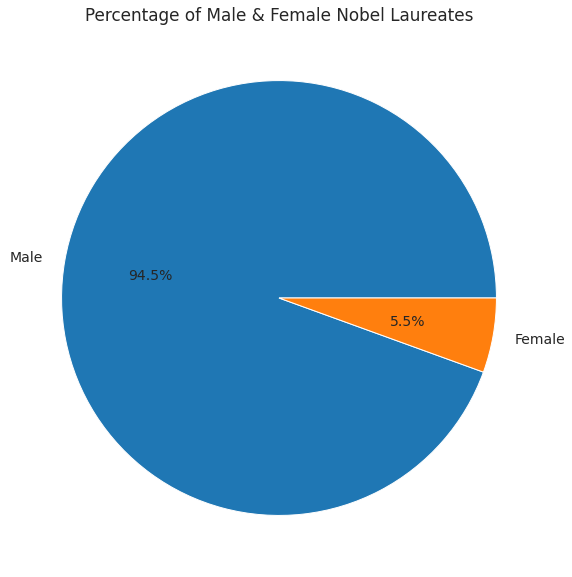

In [ ]:
plt.title('Percentage of Male & Female Nobel Laureates')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0);

>- plt.pie() function is use to draw a pie charts of different values.
>- plt.pie() is used to compare percentage wise distribution of data.

#### Q2: The Number of Nobel Laureates in each Category?

In [ ]:
category=nobel_df['category'].value_counts()
category

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

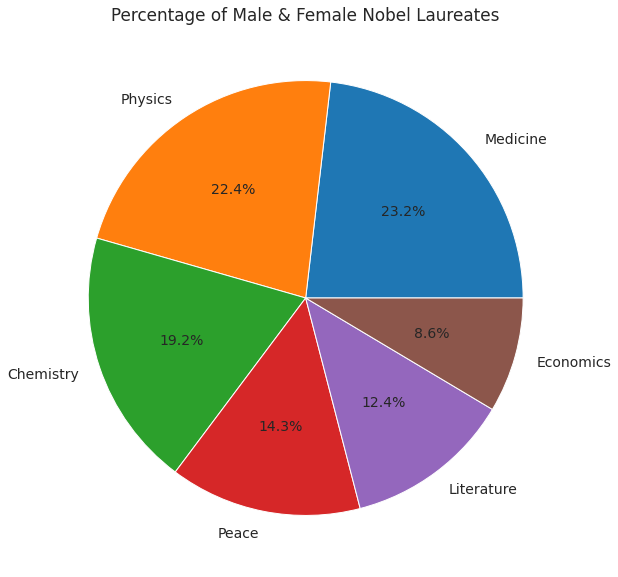

In [ ]:
plt.title('Percentage of Male & Female Nobel Laureates')
plt.pie(category, labels=category.index, autopct='%1.1f%%', startangle=0);

> **The above result shows the Number of Nobel Laureates in each category.**
>- value_counts() function gives, how many times a specific value is repeated.
>- plt.pie() function is use to draw a pie charts of different values.
>- pie() function is used to compare percentage wise distribution of data.

#### Q3: How many individuals or organizations have won a Nobel Prize?

In [ ]:
nobel_df.full_name.nunique()

904

There are total 904 Individuals or organization who have won a Nobel Prize.
About nunique() : This function gives no. of unique values in a column of data frame.

#### Q4: Which are the top 10 countries with highest number of Nobel Laurreates ?

In [ ]:
top_countries=nobel_df.birth_country.value_counts().head(10)

In [ ]:
top_countries

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

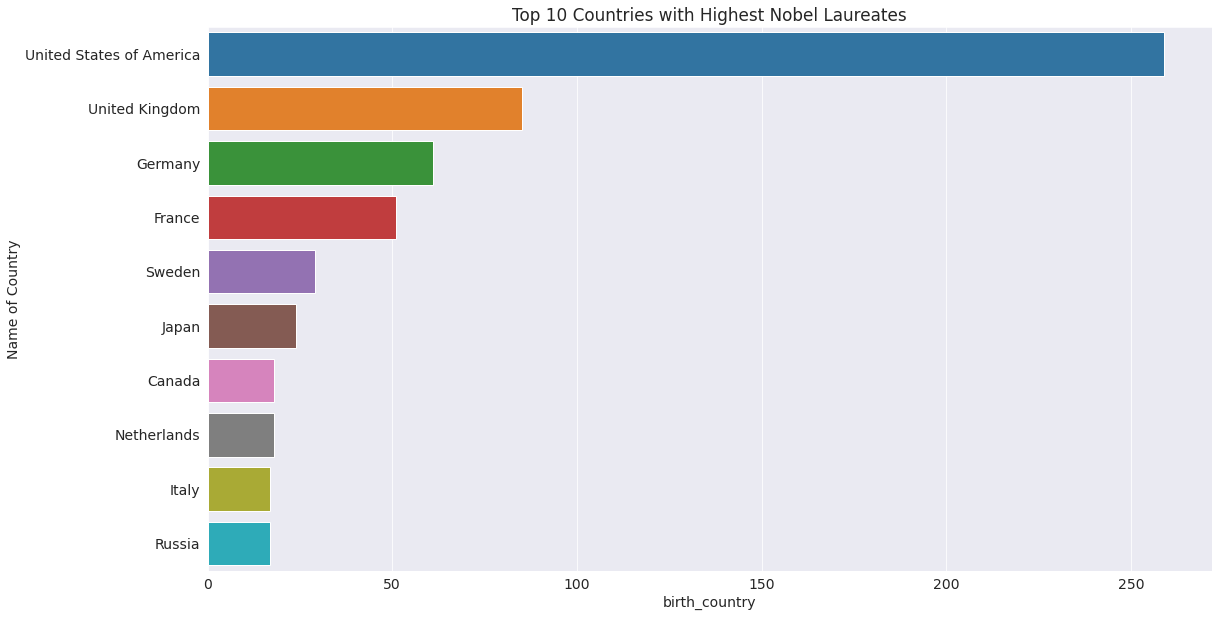

In [ ]:
plt.title('Top 10 Countries with Highest Nobel Laureates')
plt.xlabel('Number of Nobel Laureates')
plt.ylabel('Name of Country')

sns.barplot(x=top_countries,y=top_countries.index);

>- sns.barplot() is used to show a bar plot.
>- It is generally use  to compare the values.

#### Q5: Top 10 Who won the Nobel Prize more than once ?

In [ ]:
person=nobel_df.full_name.value_counts().head(10)
person

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Jacobus Henricus van 't Hoff                                                         1
Ronald H. Coase                                                                      1
Octavio Paz                                                                          1
Joseph E. Murray                                                                     1
Name: full_name, dtype: int64

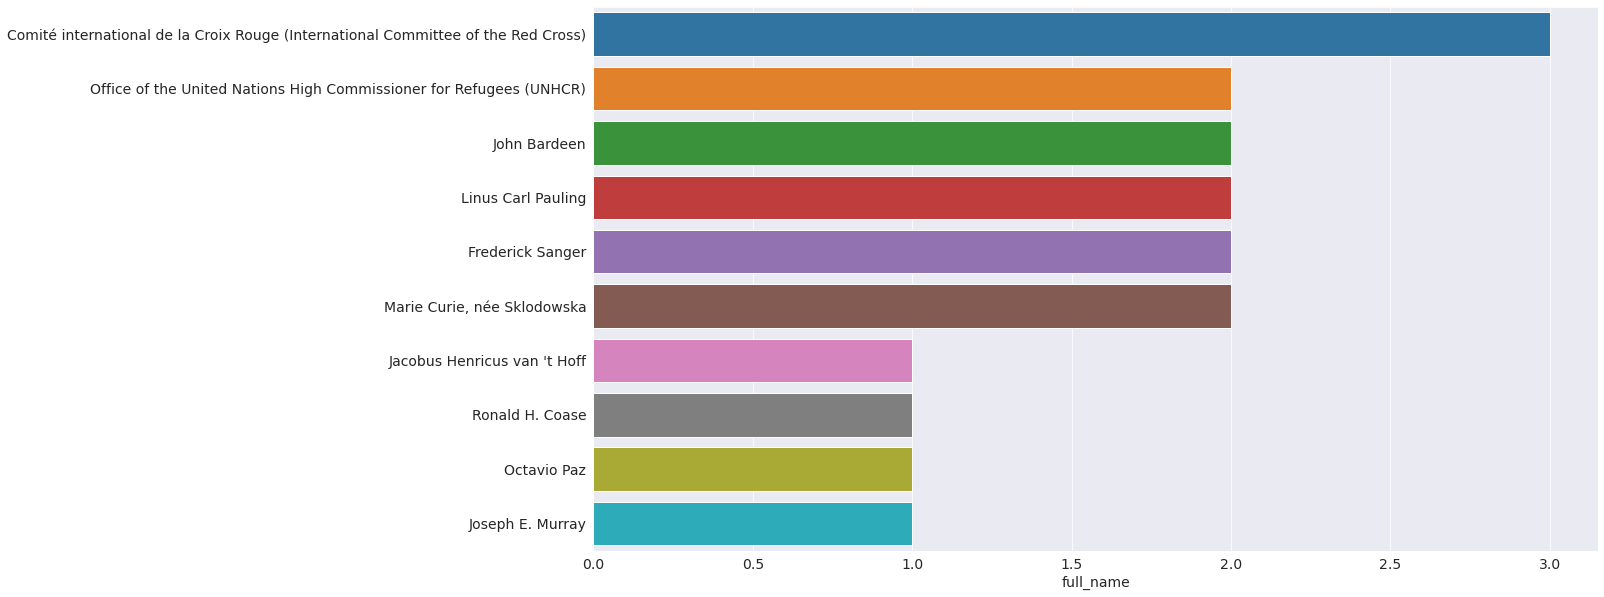

In [ ]:
sns.barplot(x=person,y=person.index);

>- sns.barplot() is used to show a bar plot.
>- It is generally use to compare the values.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khanaabidabdal/nobel-prize-insight" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/khanaabidabdal/nobel-prize-insight


'https://jovian.com/khanaabidabdal/nobel-prize-insight'

## Inferences and Conclusion

> The Following conclusions can be made :
>- Economics field was added in Nobel Prize category after 1965. Therefore, it has least number of Nobel Laureates.
>- There are only 5.5% Female Laureates.
>- The Medicine Category has largest number of Nobel Laureates because in medicine category large number of times Nobel
Prize is shared between the Individuals.
>- In Literature only 4 times Nobel Prize is shared between the individuals.
>- Red cross society has the largest number of Nobel Prize with value equals to 3.
>- USA has the largest number of Nobel laureates followed by UK,Germany,France.
>- There are 904 different individuals who won a Nobel Prize.
>- Only in Peace category Nobel Prize is given to organizations.
>- During the first world war and second world war Nobel Prize was not awarded.
>- Before and after period of wars, the Nobel Peace Prize shows the decline because of wars and conflicts.(Other prizes was given except peace prize)   


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khanaabidabdal/nobel-prize-insight" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/khanaabidabdal/nobel-prize-insight


'https://jovian.com/khanaabidabdal/nobel-prize-insight'

## References and Future Work

> The following are the future ideas:
>- You can find the which continents has the highest number of Nobel Laureates.
>- You can find the persons who has won a Nobel prize in two different category like Marie Curie.
>- You can also find Oldest and Youngest Nobel Laureates.
>- You can also defined function to find the whether your favorite physicist,writer,economist,etc has won a Nobel Prize or Not.
>- By importing top universities country wise, you can compare the Number of Nobel laureates and university rank.
>-

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khanaabidabdal/nobel-prize-insight" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/khanaabidabdal/nobel-prize-insight


'https://jovian.com/khanaabidabdal/nobel-prize-insight'